In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.8)

In [4]:
df_offers = pd.read_csv(r"C:\Users\User\Documents\Wine.csv")
df_offers.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
df_offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
df_offers.shape

(178, 14)

In [7]:
df_offers.size

2492

In [9]:
df_offers.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [15]:
#missing values
df_offers.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

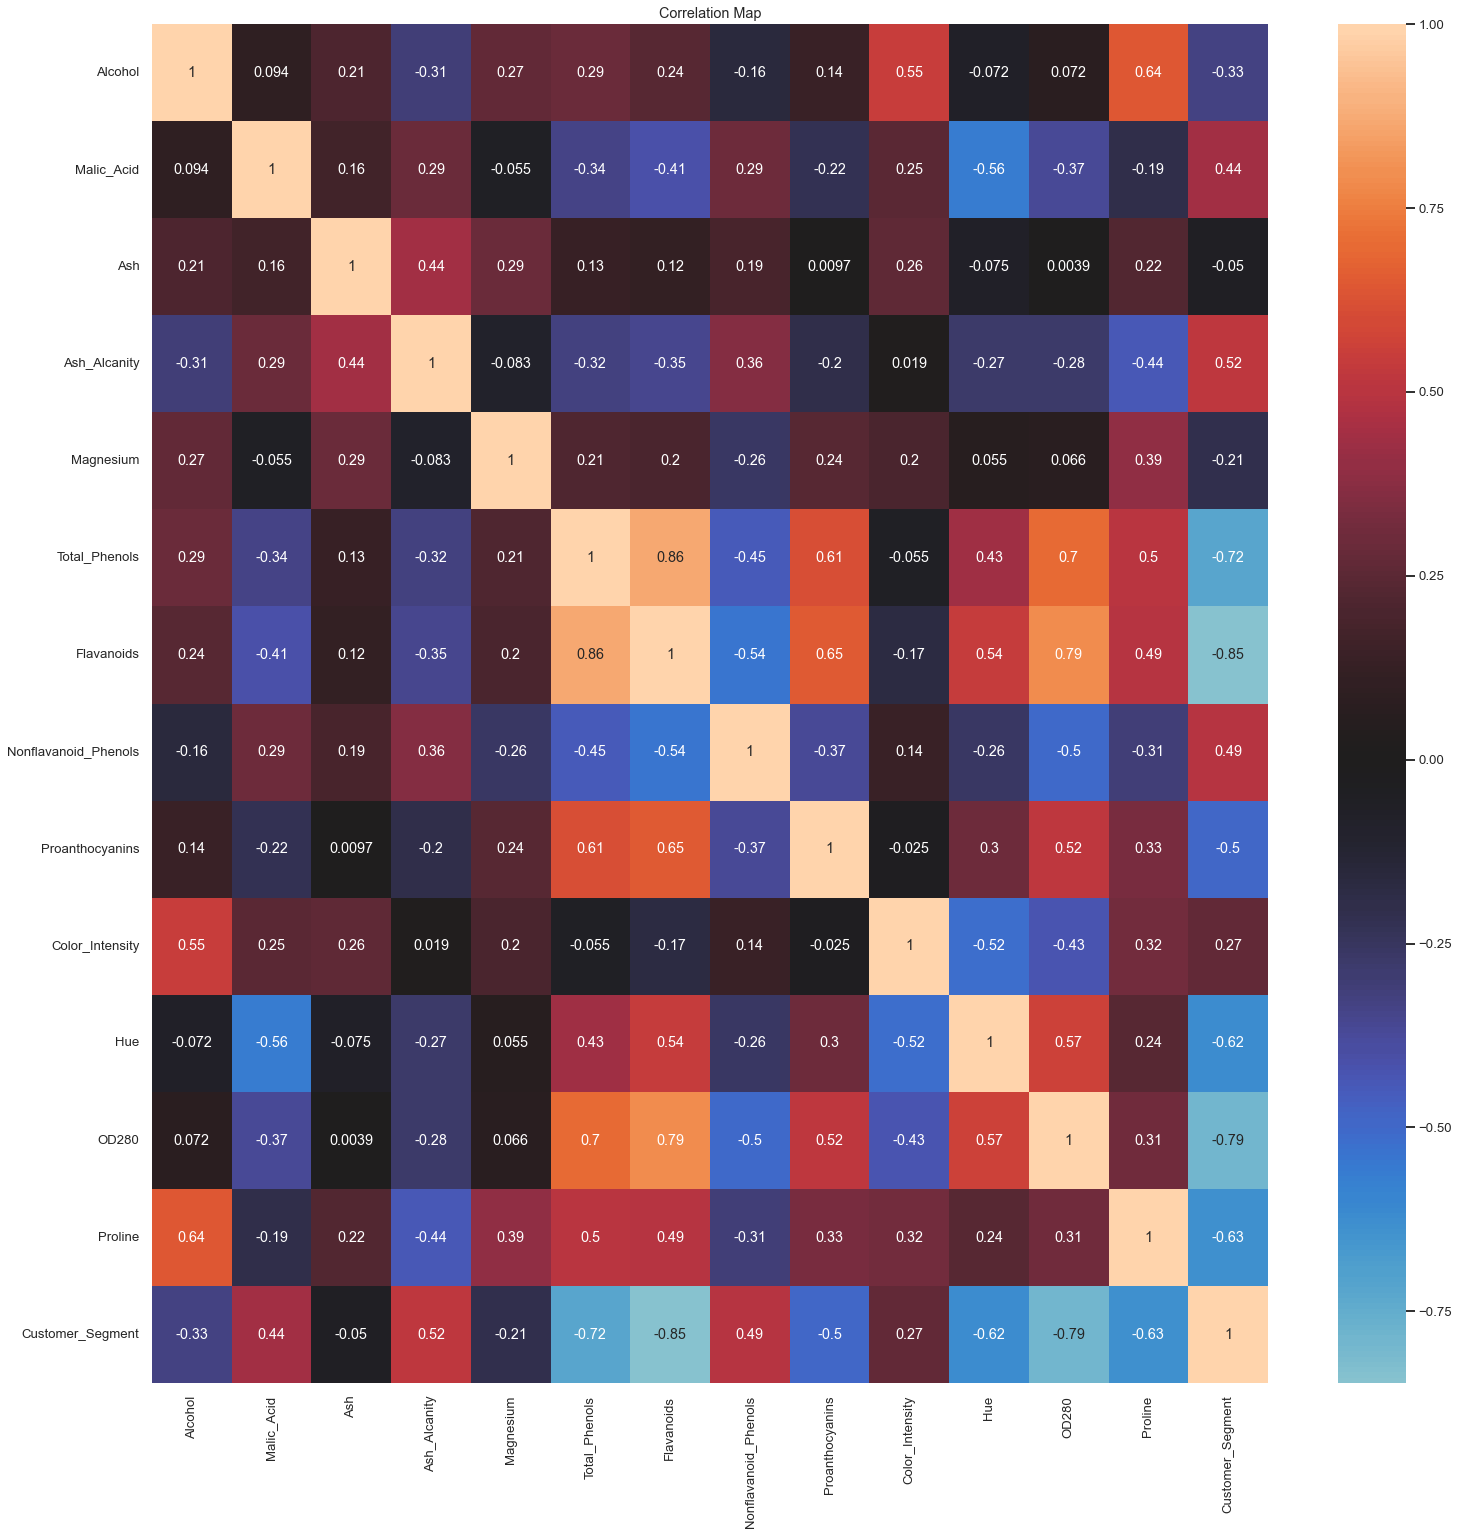

In [11]:
#visualization
plt.figure(figsize=(25,25))
sns.heatmap(df_offers.corr(), center=0, annot=True)
plt.title("Correlation Map")
plt.show()

<Figure size 432x288 with 0 Axes>

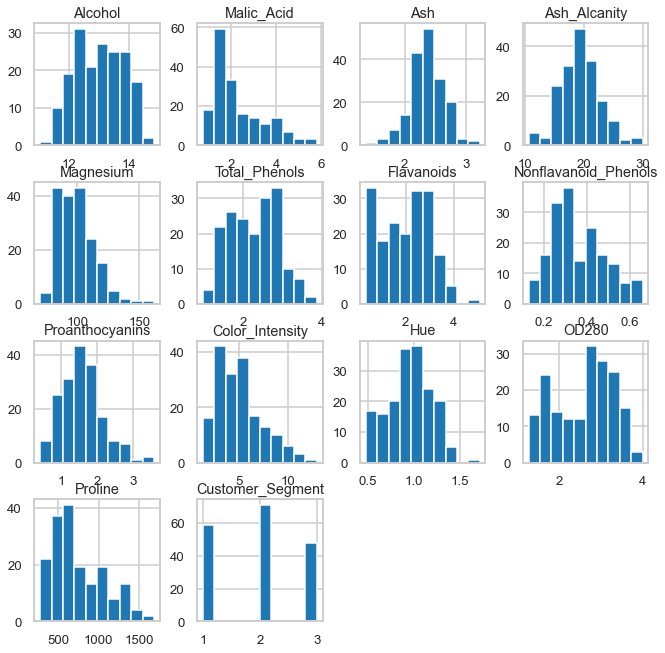

<Figure size 432x288 with 0 Axes>

In [13]:
#histogram
df_offers.hist(figsize=(11,11))
plt.figure()

## K-Means Clustering

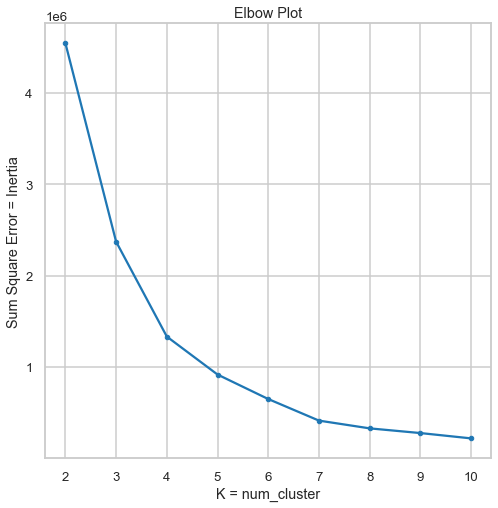

In [16]:
from sklearn.cluster import KMeans

x_cols = np.array(df_offers.iloc[:, :32])
ss = [];
ks = range(2, 11)
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=2)
    labels = kmeans.fit_predict(x_cols)
    ss.append(kmeans.inertia_)
f, axes = plt.subplots(figsize=(8, 8))
axes.plot(ks, ss, marker='.')
axes.set(xlabel='K = num_cluster', ylabel = 'Sum Square Error = Inertia', title = 'Elbow Plot')
plt.show()

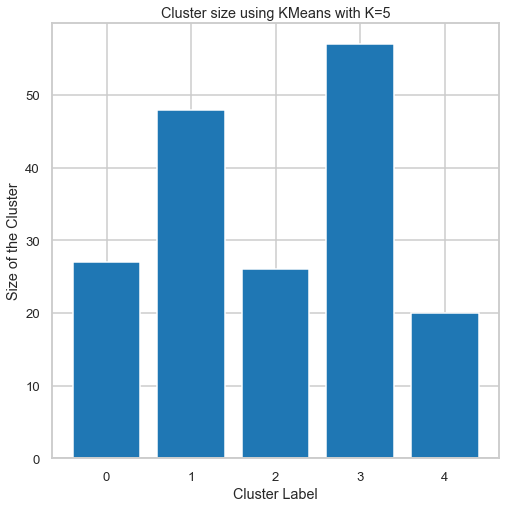

In [17]:
# Pick 5 clusters
kmeans = KMeans(n_clusters=5, random_state=2)
df_offers['labels'] = kmeans.fit_predict(x_cols)
cluster_size = df_offers.labels.value_counts()
f, axes = plt.subplots(figsize=(8, 8))
axes.bar(cluster_size.index, cluster_size)
axes.set(xlabel='Cluster Label', ylabel='Size of the Cluster', title='Cluster size using KMeans with K=5')
plt.show()
df_offers = df_offers.drop('labels', axis=1)

### The Silhouette Method

n_cluster=3, Average silhouette score = 0.571
n_cluster=4, Average silhouette score = 0.562
n_cluster=5, Average silhouette score = 0.549
n_cluster=6, Average silhouette score = 0.564
n_cluster=7, Average silhouette score = 0.562
n_cluster=8, Average silhouette score = 0.555
n_cluster=9, Average silhouette score = 0.518
n_cluster=10, Average silhouette score = 0.520


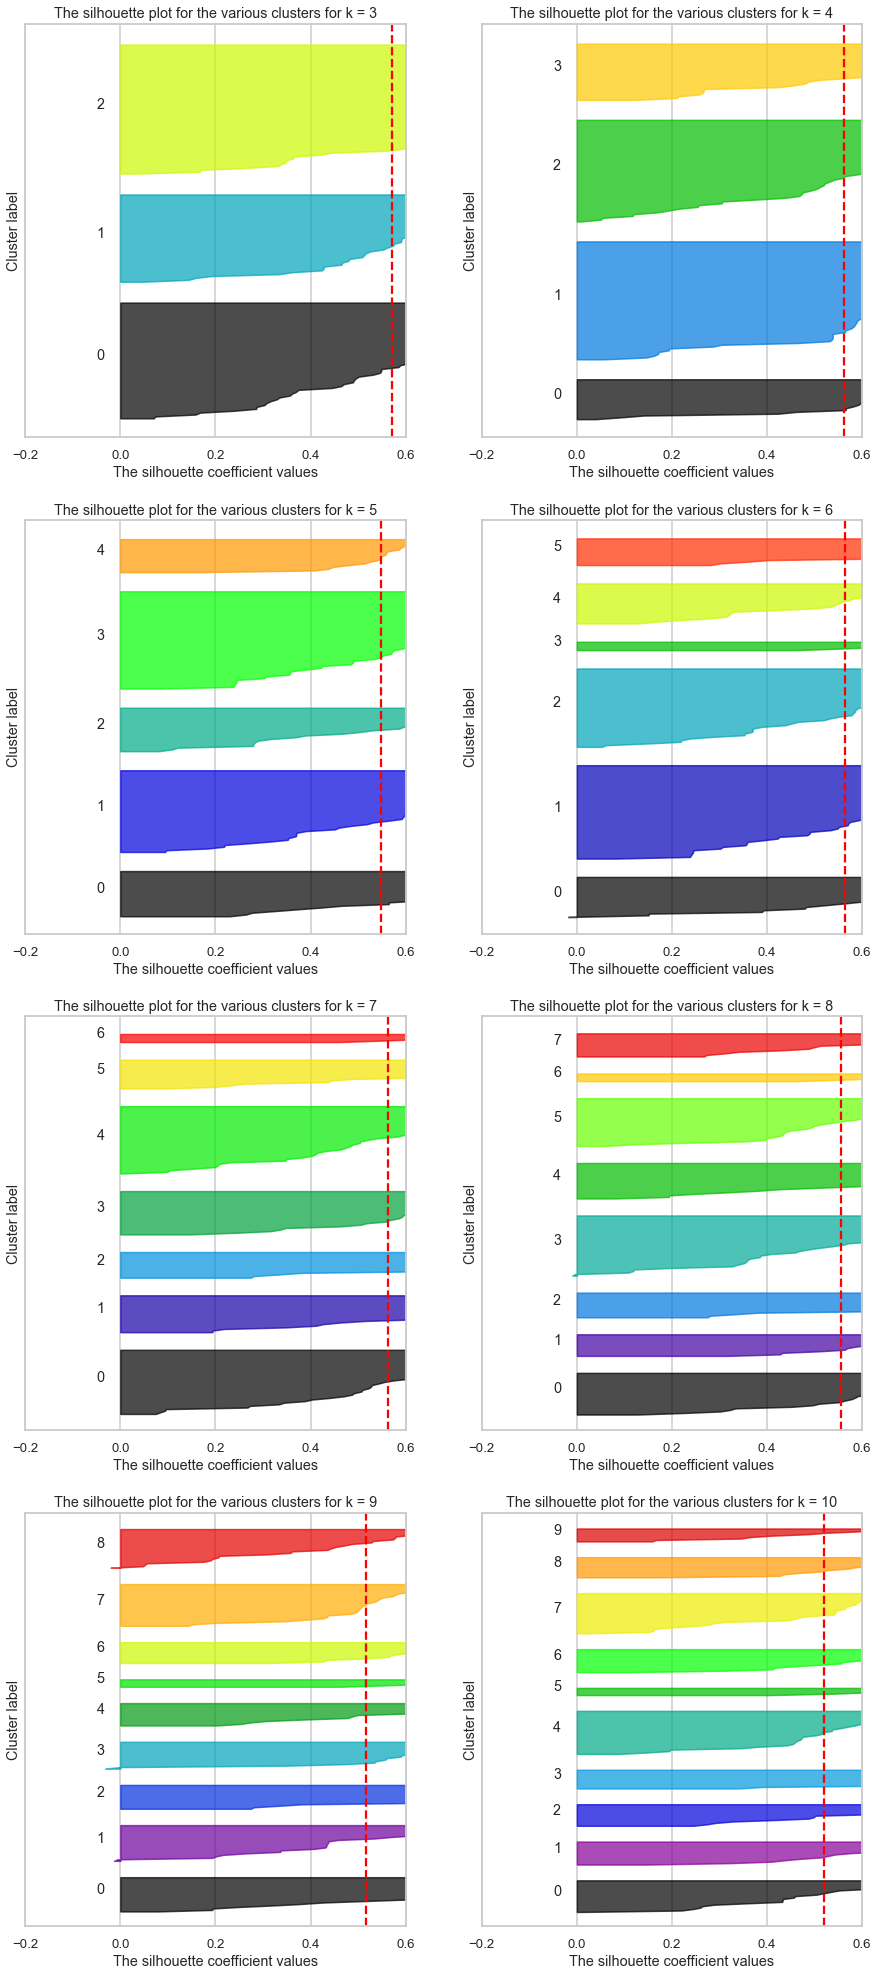

In [20]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
ks = range(3, 11)
f, axes = plt.subplots(len(ks)//2, 2, figsize=(15, 35))
silhouette_avg = []
for idx, k in enumerate(ks):
    kmeans = KMeans(n_clusters=k, random_state=2)
    labels = kmeans.fit_predict(x_cols)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg.append(silhouette_score(x_cols, labels))
    print('n_cluster={0}, Average silhouette score = {1:.3f}'.format(k, silhouette_avg[-1]))
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_cols, labels)
    
    # xlim: The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.2, 0.6]
    # ylim: The (n_clusters+1)*10 is for inserting blank space between silhouette 
    # plots of individual clusters, to demarcate them clearly.
    axes[idx//2, idx%2].set(xlim=[-0.2, 0.6], ylim=[0, len(x_cols)+(k+1)*10])
    y_lower=10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        axes[idx//2, idx%2].fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        axes[idx//2, idx%2].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    axes[idx//2, idx%2].set(xlabel='The silhouette coefficient values', ylabel='Cluster label')
    axes[idx//2, idx%2].set(title='The silhouette plot for the various clusters for k = {}'.format(k))
    axes[idx//2, idx%2].axvline(x=silhouette_avg[-1], color='red', linestyle='--')
    axes[idx//2, idx%2].set(yticks=[], xticks=[-0.2, 0, 0.2, 0.4, 0.6])

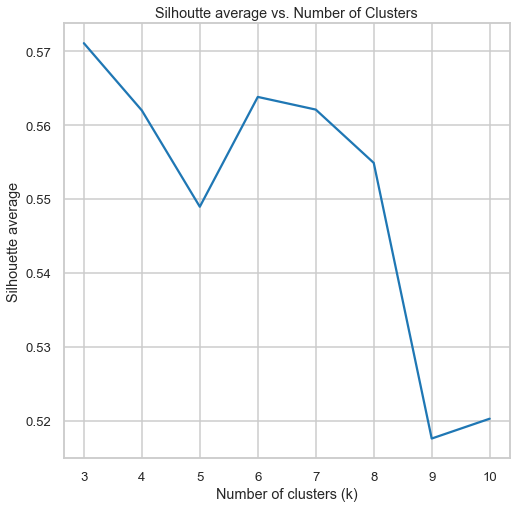

In [21]:
f, axes = plt.subplots(figsize=(8, 8))
axes.plot(ks, silhouette_avg)
axes.set(xlabel='Number of clusters (k)',ylabel = 'Silhouette average', title ='Silhoutte average vs. Number of Clusters')
plt.show()

From the above silhoutte average plot, it does look like best choice for the number of clusters = 3

### Agglomerative Clustering

In [25]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
algo_sil_score = pd.DataFrame(index=[ 'Agglomerative Clustering'])
algo_sil_score['algo_avg_silhouette_score']=0
algo_sil_score['cluster_size']=0

k_range = range(2, 11)
l_types = ['ward', 'complete', 'average']
#l_types = ['complete']
max_sil_score = -np.inf
best_k, best_l = None, None
for k in k_range:
    for l in l_types:
        ac = AgglomerativeClustering(n_clusters=k, linkage=l)
        labels = ac.fit_predict(x_cols)
        score = metrics.silhouette_score(x_cols, labels)
        (best_k, best_l, max_sil_score) = (k, l, score) if score>max_sil_score else (best_k, best_l, max_sil_score)
        #print(k, l, score, max_sil_score)
print('Best num cluster = {0:d}, Best linkage = {1}, Best silhouette score = {2:.3f}'.format(best_k, best_l, max_sil_score))

ac = AgglomerativeClustering(n_clusters=best_k, linkage=best_l)
labels = ac.fit_predict(x_cols)
print('Average Silhouette Score: {0:.3f}'.format(metrics.silhouette_score(x_cols, labels)))
algo_sil_score.loc['Agglomerative Clustering'] = [max_sil_score, best_k]

Best num cluster = 2, Best linkage = ward, Best silhouette score = 0.659
Average Silhouette Score: 0.659
